In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv("D:/ML/student-mat.csv",sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

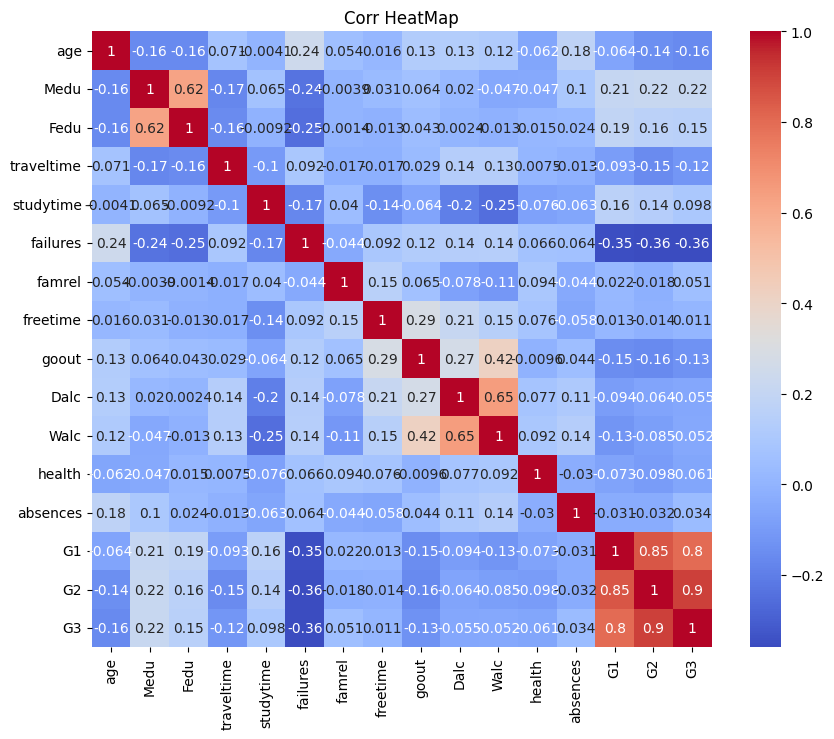

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("Corr HeatMap")
plt.show()

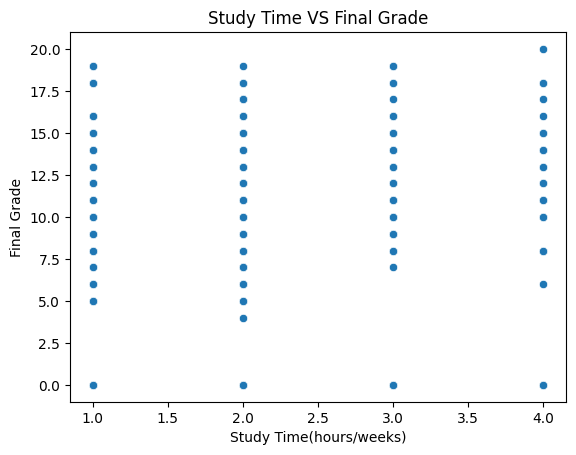

In [6]:
sns.scatterplot(x=df['studytime'],y=df['G3'])
plt.title("Study Time VS Final Grade")
plt.xlabel("Study Time(hours/weeks)")
plt.ylabel("Final Grade")
plt.show()

In [7]:
selected_features=['studytime','absences','G1','G2','failures','freetime']
x=df[selected_features]
y=df['G3']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [10]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [12]:
print(f"mean_absolute_error : {mae:.2f}")
print(f"mean_squared_error : {mse:.2f}")
print(f"r2_score : {r2:.2f}")

mean_absolute_error : 1.45
mean_squared_error : 4.58
r2_score : 0.78


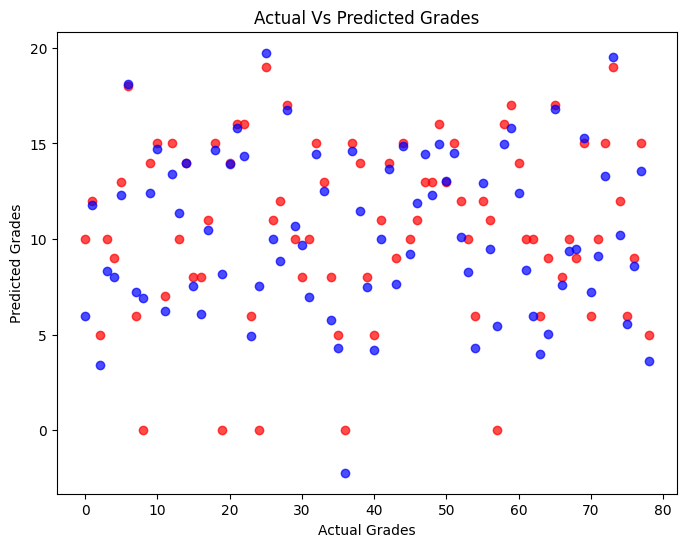

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Grades', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Grades', alpha=0.7)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual Vs Predicted Grades")
plt.show()

In [28]:
print("Student Performance Prediction")
studytime =float(input("Study Time (hours/week)"))
absences = int(input("Number of Absences"))
G1 = float(input("First Period Grade"))
G2 = float(input("Second Period Grade"))
failures = int(input("Past Failures"))
freetime = int(input("Free Time (scale 1-5)"))
inputs = np.array([[studytime, absences, G1, G2, failures, freetime]])
prediction = model.predict(inputs)
print(f"Predicted Final Grade: {prediction[0]:.2f}")

Student Performance Prediction


Study Time (hours/week) 15
Number of Absences 5
First Period Grade 19
Second Period Grade 20
Past Failures 0
Free Time (scale 1-5) 3


Predicted Final Grade: 93.93


In [36]:
from joblib import dump
dump(model, 'D:/ML/student_performance_model.joblib')
print("Model saved as 'student_performance_model.joblib'")

Model saved as 'student_performance_model.joblib'
